# <div style="text-align: center"> Convex optimization for machine learning: Part I</div>
#### <div style="text-align: right"> Prof. Changho Suh, TA Gyeongjo Hwang, Doyeon Kim</div>

## 강의내용 복습

### A-1. Least-squares optimization이란?
- 이차함수를 최소화하는 optimization 문제의 일종, $\mathrm{min}_{x} ||Ax - b ||^2$로 표현됌.
- _Least_는 _"minimization"_으로부터, _squares_는 _"제곱"_으로부터 나온 이름
<img src="./figures/LS1.png" width="400"/>
<br/>
- Least-squares optmization은 약 200년 전 Gauss가 천체의 이동경로에 대한 관측값을 가장 잘 설명하는 매개변수를 찾기 위해 세웠는데, 그 이후로 수많은 분야에서 널리 사용되고 있음. 특히, 경제학에서 사용되는 대부분의 모델(OLS, WLS, GLS 등)은 모두 least-squares regression에 바탕을 두고 있으며, 현대 영상의학 기술의 핵심인 CT에서도 least-squares가 사용되고 있음.
<img src="./figures/LS2_2.png" width="600"/>
&nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  최초의 least-squares optimization  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  Carl Friedrich Gauss
<br/><br/>
- 이 문제에는 다음과 같은 잘 알려진 closed-form solution이 존재함: $x^* = (A^T A)^{-1}A^T b$.

### A-2. Least-squares classifier
- Classification 문제는 크게 다음과 같은 두 가지 경우로 나누어 생각할 수 있음:<br/>
  __(1) 주어진 데이터가 선형함수로 잘 나누어지는 경우__(_separable case_)<br/>
  __(2) 그렇지 않은 경우__(_non-separable case_)<br/>
- _Separable case_의 경우 두 데이터를 나눌 수 있는 임의의 선형함수를 classifier로 사용 가능.
- _Non-separable case_의 경우 편차의 합(aggregated margin)을 최소화하는 함수를 찾는 문제로 변경.
- <font color='red'>Least-squares classifier는 제곱편차의 합(aggregated squared error)을 최소화하는 선형함수를 찾는 문제.</font>
- 데이터 $(x_1, y_1), (x_2, y_2), \dots (x_m, y_m),$가 주어졌을 때, least-squares classifier는 다음과 같이 $w$라는 매개변수를 가진 선형함수로 나타낼 수 있음.
<img src="./figures/LS4.png" width="400"/>
<br/>
- 제곱편차의 합을 최소화하는 문제는 다음과 같이 표현할 수 있음. 식에서 $x_{i}^{T}w - y_i$는 편차를, $|| \cdot ||^2$은 제곱을, $\sum$은 합을 나타냄.
<img src="./figures/LS5.png" width="250"/>
- 이때, $A:=\begin{bmatrix}x_{1}^{T} \\ \vdots \\ x_{m}^{T} \end{bmatrix}$, $b:=\begin{bmatrix}y_{1} \\ \vdots \\ y_{m} \end{bmatrix}$로 치환하면, 이는 $\mathrm{min}_{w \in \mathbb{R}^d} || Aw-b||^2$와 같은 형태로 나타남.
- 앞서 언급했던 closed form solution을 이용하여, $w^* = (A^T A)^{-1}A^T b$를 구할 수 있음.

### A-3. Testing classifiers
- Machine learning 분야에서, 학습한 classifier의 성능을 측정하는 대표적인 방법은 test error를 측정하는 것.
- Test error는 classifier가 학습 과정에서 보지 않았던, 새로운 데이터(unseen data or _test data_)에 대해 성능을 측정함으로써 얻음.
- 아래 그림과 같이 input으로 test data $x_{test}$가 주어졌을 때, output인 $x_{test}^{T}w^*$를 얻고,<br/>
  (1) 만약 $x_{test}^{T}w^* \geq 0$라면 이 데이터의 predicted label을 $\hat{y}_{test}=1$이라 선언,<br/>
  (2) 반대로 $x_{test}^{T}w^* < 0$라면 이 데이터의 predicted label을 $\hat{y}_{test}=0$이라 선언함. <br/>
<img src="./figures/LS6.png" width="550"/>


### A-4. Regularization technique
- 실제 상황에서는 각각의 data point $x$가 노이즈를 포함하고 있는데, 사람 혹은 기계의 측정으로부터 데이터를 얻기 때문에 error를 수반할 수밖에 없음.
- $w^*$의 값이 크면 $x$의 값이 조금만 바뀌어도 output prediction의 값이 크게 변하고, 이는 noise로부터 오는 error를 더욱 키울 수 있음.
- 이를 해결하기 위해 본래의 objective function인 $||Aw - y||^2$와 함께 $||w^{*}||^2$를 최소화하는 <font color='red'>regularized least-squares</font> 문제를 고려할 수 있음: $\mathrm{min}_{w \in \mathbb{R}^d} || Aw-b||^2 + \lambda ||w ||^2$
- _Regularization factor_라 불리는 $\lambda$값을 변화시킴에 따라 train error와 test error는 다음과 같은 형태로 변화함을 실험적으로 확인할 수 있음.
<img src="./figures/LS7.png" width="450"/>

### B-1. Machine learning (기계학습)
- Machine learning이란 특정 task를 수행하는 컴퓨터 시스템을 학습시키는 알고리즘에 대한 연구를 일컫음.
- 시스템은 input을 입력받아 output을 출력하는데, ML은 아래의 사다리꼴에 해당하는 컴퓨터 시스템을 데이터와 알고리즘을 통해 학습시킨다고 볼 수 있음.
<img src="./figures/ML1.png" width="350"/>
<br/>
- 이 과정을 machine의 관점에서 해석해보면, machine은 ___데이터로부터 학습___ 하며, 이에 따라 "machine learning"이라는 이름이 붙여짐.
- ML의 최종 목표는 학습한 machine이 <font color='red'>__지능을 가진 존재__</font>와 같이 행동하도록 만드는 알고리즘을 설계하는 것

### B-2. Supervised learning (지도학습)
- ML의 목표를 달성하는 방법들 중 가장 널리 쓰이는 것은 supervised learning (지도학습) 기법.
- Supervised learning이란, _supervisor_의 도움을 받아 machine을 나타내는 함수 $f(\cdot)$를 학습하는 것을 일컫으며, 여기서 _supervisor_는 input-output 샘플을 제공하는 역할을 수행함.
- Supervised learning의 목표는 주어진 데이터셋 $\{(x^{(i)}, y^{(i)}) \}_{i=1}^{m}$을 이용하여 machine의 함수 $f(\cdot)$를 추정하는 것. 학습 이후 $f(\cdot)$ 함수는 다음과 같은 조건을 만족할 것으로 기대함: $y^{(i)} \approx f(x^{(i)})~ \forall i$
<img src="./figures/ML2.png" width="250"/>
<br/>
- 위의 조건을 나타내기 위해 <font color='red'>loss</font> function $l(y^{(i)}, f(x^{(i)}))$을 도입하고, 이를 이용해 다음과 같은 optimization 문제로 표현함: $\mathrm{min}_{f(\cdot)} \sum_{i=1}^{m} l(y^{(i)}, f(x^{(i)}))$.
- 하지만 이는 <font color='red'>function</font> optimization 문제로, 풀기가 쉽지 않음.
- 이를 해결하기 위해 $f(\cdot)$를 매개변수 $w$로 나타내고, $w$를 optimization variable로 보는 방법이 널리 쓰임.

### B-3. Machine learning as optimization
- 만약 두 함수 (1) $f_{w}(x^{(i)})$ and (2) $l(y^{(i)}, f_{w}(x^{(i)}))$ 가 $w$에 대해 convex이면, convex optimization techniques을 사용할 수 있음.
- 이들 함수를 정의하는 한 가지 방법은 Frank Rosenblat가 제안한 __Perceptron__인데, 이는 세포막 전위(membrane potential)의 임계값을 넘어서는 전기신호가 들어왔을 때 시냅스를 통해 나트륨 및 칼슘 이온이 빠져나가는 신경세포의 특성을 따라 만든 것.
<img src="./figures/ML3_2.png" width="600"/>
&nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  Perceptron architecture  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  Frank Rosenblatt
<br/><br/>
- Percentron의 activation function $f_w(x) = \mathbf{1}\{w^T x > th\}$을 다음과 같은 미분 가능한 함수로도 바꿔볼 수 있음.
  1. __Linear__: $f_w(x) = w^T x$
  2. __Logistic (or sigmoid)__: $f_w(x) = \dfrac{1}{1+e^{-w^T x}}$<br/><br/>
- 각각의 경우에 대해, loss function $l(\cdot, \cdot)$을 잘 정의하면 least-squares classifier와 logistic regression을 얻을 수 있음.<br/>

| <p align="left">&nbsp; &nbsp; &nbsp; &nbsp;Name of classifier</p> | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Activation function &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Loss function &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |
| :---: | :--- | :--- |
| <p align="left">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Perceptron</p> | <p align="left">&nbsp; &nbsp; &nbsp; &nbsp;$f_w(x) = \mathbf{1}\{w^T x > th\}$</p> | <p align="left">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $\cdot$</p> |
| <p align="left">&nbsp; &nbsp;Least-squares classifier</p> | <p align="left">&nbsp; &nbsp; &nbsp; &nbsp;$f_w(x) = w^T x$</p> | <p align="left">&nbsp; &nbsp; &nbsp; &nbsp;$l(y,\hat{y}) = ||y-\hat{y}||^2$</p> |
| <p align="left">&nbsp; &nbsp; &nbsp; &nbsp; Logistic regression | <p align="left">&nbsp; &nbsp; &nbsp; &nbsp;$f_w(x) = \dfrac{1}{1+e^{-w^T x}}$</p> | <p align="left">&nbsp; &nbsp; &nbsp; &nbsp;$l(y,\hat{y}) = -ylog\hat{y} - (1-y)log(1-\hat{y})$</p> |

## 실습목표
__<font color='blue'>1. Least-squares classifier의 원리를 이해하고, 이를 코드로 직접 구현한다.</font>__
 - 구현한 least-squares classifier를 다양한 데이터셋에 적용하여 성능을 측정해본다.

__<font color='blue'>2. Least-squares optimization의 또다른 응용분야인 CT를 이해하고, 위에서 구현한 코드를 이용하여 이를 실습해본다.</font>__<br/>
__<font color='blue'>3. Logistic regression classifier의 원리를 이해하고, 이를 코드로 직접 구현한다.</font>__
  - 이때 필요한 ___Gradient descent algorithm___의 원리를 이해하고, ___backpropagation___ 코드를 작성한다.
  - 구현한 logistic regression classifier를 다양한 데이터셋에 적용하여 성능을 측정해본다.

__<font color='blue'>4. Least-squares classifier와 logistic regression classifier의 공통점과 차이점에 대해 논의한다.</font>__

# 1. Least-squares classifier

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
plt.rcParams['figure.figsize'] = (12, 8)

## 1-1. Synthetic data generation
- 본 실습의 진행에 앞서 우선 합성데이터(synthetic data)를 생성.
- 합성데이터는 $\mathbb{R}^2$에서 정의되는 두 개의 정규분포를 사용함.

In [3]:
# 정규분포를 따르는 합성데이터 생성함수 및 데이터 플로팅 함수 정의
from LS_utils import generate_normal, plot

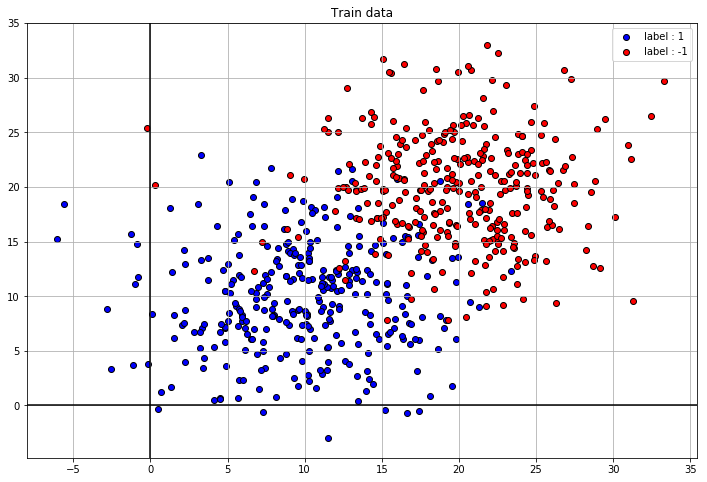

In [4]:
(X_train, Y_train), (X_test, Y_test) = generate_normal(800)
plot(X_train, Y_train)

In [5]:
# 데이터의 평균과 표준편차가 각각 0과 1이 되도록 정규화하는 함수
def Normalize(data):
    return (data - data.mean()) / data.std()

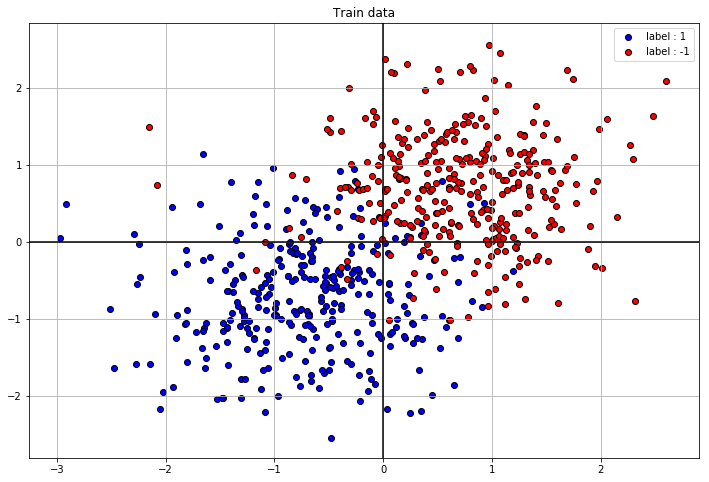

In [6]:
X_train = Normalize(X_train)
X_test = Normalize(X_test)
plot(X_train, Y_train)

---
### Problem 1: Least-squares classifier 구현

**실습:**

크게 2개의 함수를 구현한다.
  1. "fit" 함수
    - Least-squares optimization의 closed-form solution을 구하는 과정.
    - 코드는 <font color='red'>__w = "closed-form solution"__</font>형태로 작성
    - <font color='blue'>np.linalg.inv를 이용한 matrix inverse, transpose를 취하는 .T함수, A@B 형태의 matrix multiplication</font> 이용
  2. "get_accuracy" 함수
    - get_accuracy 함수는 여러 개의 데이터 샘플이 들어왔을 때 이들에 대한 prediction 값들을 구하고, 그 결과가 맞는 값들의 비율을 구하는 함수.
    - <font color='blue'>predict, np.sign, np.array.reshape, np.array.sum 함수 등을 이용</font>, ex) A.reshape(len(labels), 1), B.sum()

In [7]:
def fit(X, Y):
    
    ### START CODE HERE ### 
    w =(np.linalg.inv(X.T@X)@X.T)@Y
    ### END CODE HERE ###
    return w

In [8]:
def get_accuracy(w, X, Y):
    
    pred = X.dot(w)
    ### START CODE HERE ### 
    yhat = np.sign(pred)
    n_samples = len(Y)
    n_correct = (yhat == Y).sum()
    acc = n_correct / n_samples * 100
    ### END CODE HERE ###
    return acc

In [9]:
def LeastSquare(X_train, Y_train, X_test, Y_test):
    
    # get optimal sol
    w = fit(X_train, Y_train)
    
    # train accuracy
    train_acc = get_accuracy(w, X_train, Y_train)
    
    # test accuracy
    test_acc = get_accuracy(w, X_test, Y_test)
    
    return w, train_acc, test_acc

In [10]:
w, train_acc, test_acc = LeastSquare(X_train, Y_train, X_test, Y_test)
print('Train accuracy : {}%'.format(train_acc))

Train accuracy : 92.8125%


**Expected Output**: 

<table style="width:60%">
    <tr>
       <td> Train accuracy : </td>
       <td>92.8125% </td>
    </tr>

</table>

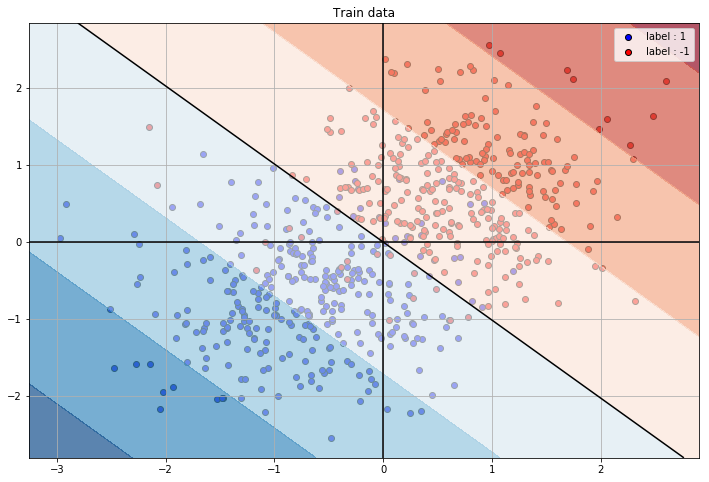

In [11]:
# Decision boundary그리는 함수
from LS_utils import draw_boundary

draw_boundary(w, X_train, Y_train, colormap=True)

**색의 진하기에 따라 prediction에 대한 confidence가 다름**

Test accuracy : 90.0%


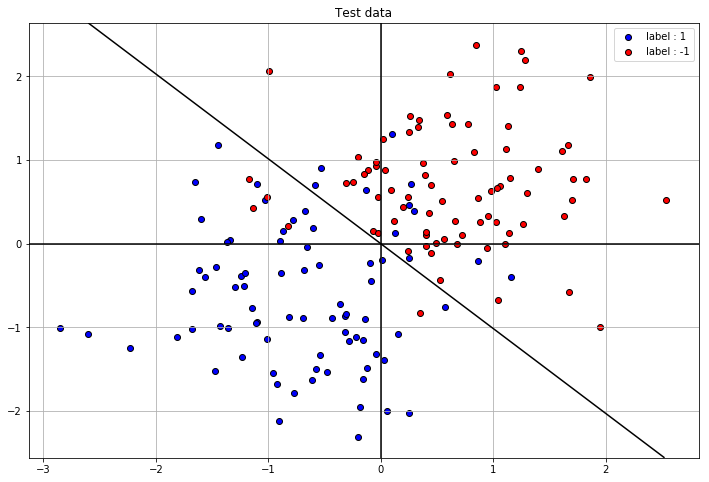

In [12]:
# test accuracy print
print('Test accuracy : {}%'.format(test_acc))
draw_boundary(w, X_test, Y_test, 'Test data', False)

### Problem 2: Least-squares classifier with bias term

<img src="./figures/w_bias.png" width="600"/>

**실습:**

위 식과 같이 bias term을 추가하기 위한 add_bias 함수를 구현하시오

In [13]:
def add_bias(X):
    
    ### START CODE HERE ###
    X_bias = np.concatenate((X, np.ones((len(X), 1))), axis=1)
    ### END CODE HERE ###
    return X_bias

In [14]:
def LeastSquare(X_train, Y_train, X_test, Y_test, bias=False):
    
    # add bias term
    if bias:
        X_train = add_bias(X_train)
        X_test = add_bias(X_test)
        
    # get optimal sol
    w = fit(X_train, Y_train)
    
    # train accuracy
    train_acc = get_accuracy(w, X_train, Y_train)
    
    # test accuracy
    test_acc = get_accuracy(w, X_test, Y_test)
    
    return w, train_acc, test_acc

####  데이터가 zero mean이 아니더라도 학습이 가능함

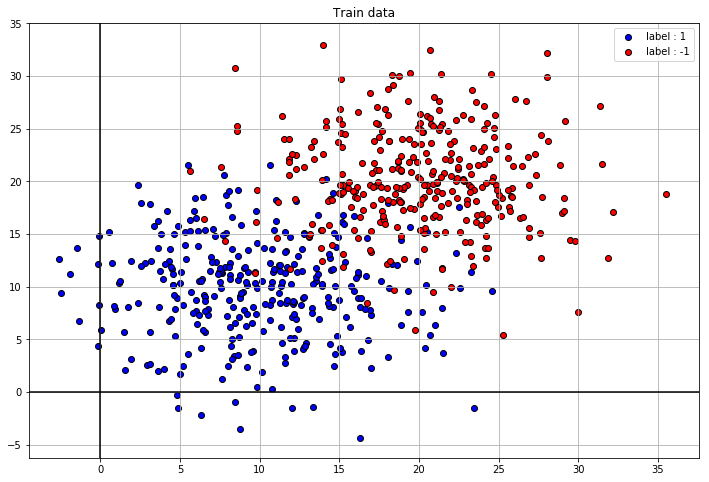

In [15]:
(X_train, Y_train), (X_test, Y_test) = generate_normal(800, seed=2020)
plot(X_train, Y_train)

In [16]:
# print train acc & test acc
w, train_acc, test_acc = LeastSquare(X_train, Y_train, X_test, Y_test, bias=True)
print('Train accuracy : {}%'.format(train_acc))
print('Test accuracy : {}%'.format(test_acc))

Train accuracy : 92.65625%
Test accuracy : 90.625%


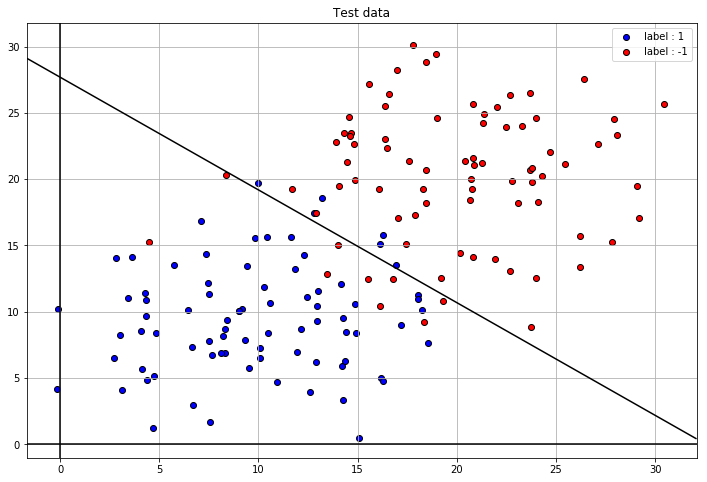

In [17]:
draw_boundary(w, X_test, Y_test, title='Test data', colormap=False)

위와 같이 bias항을 추가하면 원점을 중심으로 하지않는 데이터셋에 대해서도 학습을 할 수 있다.

그러나 대부분의 상황에서 데이터에 정규화과정을 거치기때문에(데이터 전처리) 실제로는 성능 차이가 크게 나지는 않는다.

### Problem 3: Least Squares with Regularization Term

<img src="./figures/w_regularization.png" width="600"/>

**실습:**

위 식과 같이 regularization term을 추가하기 위한 add_reg() 함수를 구현하시오

**힌트:**

use
```python
np.diag([weight_decay] * len(X.T))
```

In [18]:
def add_reg(X, Y, weight_decay):
    
    weight_decay = sqrt(weight_decay)
    
    ### START CODE HERE ###
    X_r = np.diag([weight_decay] * len(X.T))
    Y_r = np.zeros(len(X.T))
    X_decay = np.concatenate((X, X_r))
    Y_decay = np.concatenate((Y, Y_r))
    ### END CODE HERE ###
    
    return X_decay, Y_decay

In [19]:
def LeastSquare(X_train, Y_train, X_test, Y_test, bias=False, weight_decay=0):
    
    # add bias term
    if bias:
        X_train = add_bias(X_train)
        X_test = add_bias(X_test)
    
    # add regularization term
    if weight_decay:
        X_train, Y_train = add_reg(X_train, Y_train, weight_decay)
        X_test, Y_test = add_reg(X_test, Y_test, weight_decay)
        
    # get optimal sol
    w = fit(X_train, Y_train)
    
    # train accuracy
    train_acc = get_accuracy(w, X_train, Y_train)
    
    # test accuracy
    test_acc = get_accuracy(w, X_test, Y_test)
    
    return w, train_acc, test_acc

#### 람다 값과 train & test 성능의 상관관계

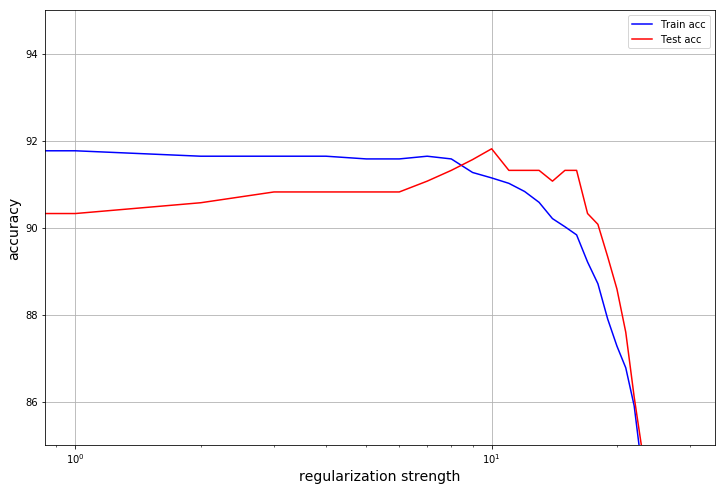

In [20]:
(X_train, Y_train), (X_test, Y_test) = generate_normal(2000, seed=9)
lambda_vec = 10 ** np.linspace(1.2, 3.0, 30)
train_acc_vec = []
test_acc_vec = []
for lambd in lambda_vec:
    w, train_acc, test_acc = LeastSquare(X_train, Y_train, X_test, Y_test, bias=True, weight_decay=lambd)
    train_acc_vec.append(train_acc)
    test_acc_vec.append(test_acc)

    
plt.plot(train_acc_vec, color='b', label='Train acc')
plt.plot(test_acc_vec, color='r', label='Test acc')
plt.gca().set_xscale('log')
plt.ylim(bottom=85, top=95)
plt.xlabel('regularization strength', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend()
plt.grid(True)

# 2. Applications of least-squares - Computed Tomography (CT)

## X-ray
- 전자기파의 일종으로써, 독일의 물리학자 빌헬름 뢴트겐이 1895년에 최초로 발견. 그는 X-ray의 발견과 함께 *영상의학* 이라는 분야를 개척, 이에 대한 공로로 1901년 노벨 물리학상을 수상함.

<img src="./figures/Röntgen.jpeg" width="500" height="500"/>
&nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  빌헬름 뢴트겐   &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  아내의 손을 촬영한 첫 X-ray 촬영 사진

### X-ray의 발견
- 뢴트겐은 기체의 방전현상을 연구하던 도중, 음극선 관에서 나온 어떤 빛이 검정색 판지를 뚫고 나오는 것을 목격. 이후 약 두 달간 이 정체모를 빛에 대한 실험을 지속하여 다음과 같은 사실을 알아냄.

  *(1) 물체는 X-ray 광자를 흡수*, *(2) 그 물체의 강도는 흡수된 광자의 갯수에 비례.*


- X-ray는 최초로 인체의 내부를 들여다볼 수 있게 해주었으나, <font color='red'>평면에 비친 2D 이미지밖에 볼 수 없다는 단점이 존재.</font>

## Computed Tomography (CT)
- 이후 1967년 Godfrey Hounsfield와 Allan Cormack이 3D 물체에 대해서도 내부 밀도를 측정할 수 있는 CT 기술을 개발, 그 공로를 인정받아 1979년 노벨 생리의학상을 수상.

<img src="./figures/CT_inventors.jpeg" width="500" height="500"/>
&nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  Godfrey Hounsfield   &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  Allan Cormack

### CT의 원리
(1) 물체에 X-ray 빔을 여러 다른 각도에서 투사,<br/>
(2) 투영된 이미지를 통해 물체의 강도를 측정,<br/>
(3) 이를 이용하여 물체의 모습을 재구성.

아래는 2-dimensional 물체에 대한 CT 적용 예시 그림:

<img src="./figures/CT_sample1.jpeg" width="500" height="500"/>

- 2x2 grid로 이루어진 물체의 각 부분의 밀도를 각각 $d_1, d_2, d_3, d_4$로 표기,
- 파란색 화살표와 같이 여러 각도에서 방사선을 투과시키고, 반대쪽에서는 투과되어 도달하는 방사선의 세기를 측정함.
- 측정된 방사선의 세기는 방사선이 투과한 물체의 밀도와 투과한 경로 사이의 선적분(line integral)에 비례.
- 선적분한 값과 측정을 통해 얻은 방사선의 세기 사이의 차이를 최소화하는 다음과 같은 <font color='blue'>***최소제곱 (Least-Squares)***</font> 최적화 문제를 고려할 수 있음.

<img src="./figures/CT_sample2.jpeg" width="500" height="500" />

In [25]:
A = np.array([
    [1, 1, 0, 0],
    [0, 0, 1, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [sqrt(2), 0, 0, sqrt(2)],
    [0, sqrt(2), sqrt(2), 0]
])

b = np.array([1.1, 0.95, 1.02, 0.9, -0.03, 2.2]).reshape(6,1)

In [26]:
"""
numpy 라이브러리의 "linalg"(linear algebra) 패키지를 이용하자. "inv"는 역행렬을 찾아주는 함수.
".T"는 transpose 연산, "@"는 행렬 곱 연산을 나타낸다.
"""
d_star = np.linalg.inv(A.T@A)@A.T@b

In [27]:
print(d_star)

[[ 0.11321568]
 [ 0.84163974]
 [ 0.82663974]
 [-0.02178432]]


### 이산화 (Discretization)

<img src="./figures/CT_sample3.jpeg" width="800" height="500"/>

- 물체가 위 그림과 같이 연속적인 형태를 가진다면, 아주 작은 부분들로 이산화하여 하나의 영역 안에서는 물체의 밀도가 일정하다고 가정.
- 이산화 후, 각각의 grid에 대한 선적분은 해당 grid의 밀도와 이 grid를 지나는 방사선의 길이의 곱으로 표현.
- 위에서 계산한 각각의 grid에 대한 선적분을 모두 더하면 반대편에서 측정한 방사선 세기의 값과 같아야 함.

<img src="./figures/CT_sample4.jpeg" width="500" height="500"/>

- 여러 다른 각도에서 방사선을 투사하여 observation matrix와 함께, 아래와 같은 최소제곱 최적화 문제를 얻음.

<img src="./figures/CT_sample5.jpeg" width="500" height="500"/>

- 최소제곱 최적화 문제는 *잘 알려진 closed-form solution이 존재*하는데, 바로 위의 $d^* = (A^T A)^{-1}A^T b$이 바로 그것.
- 다음과 같은 numpy operation을 이용하여 closed-form solution을 쉽게 계산할 수 있음.

d_star = np.linalg.inv(A.T@A)@A.T@b

In [ ]:
class ComputedTomography:
    def __init__(self, data, labels):
        self.m = data.shape[0]
        self.d = data.shape[1]
        assert self.m > self.d
        self.w = np.random.randn(self.d, 1)
        self.data = data
        self.labels = labels.reshape(-1, 1)

    def fit(self):
        ##############################################################
        #################### copy/paste your code ####################

        
        ##############################################################
        ##############################################################

    def visualize(self):
        self.w = self.w.reshape(100, 100)
        plt.imshow(self.w, cmap='gray')
        plt.show()
    
    def predict(self, data):
        ##############################################################
        #################### copy/paste your code ####################

        
        ##############################################################
        ##############################################################
        return pred

    def get_accuracy(self, data, labels):
        z = self.predict(data)
        ##############################################################
        #################### copy/paste your code ####################

        
        ##############################################################
        ##############################################################
        return acc

In [ ]:
A = np.load("./data/data_matrix.npy")
b = np.load("./data/data_measurements.npy")
print("Data matrix A\n\
Dimension: {}, dtype: {}".format(A.shape, A.dtype))
print("Observed intensity of light beams b\n\
Dimension: {}, dtype: {}".format(b.shape, b.dtype))

In [ ]:
ct = ComputedTomography(A, b)
ct.fit()
ct.visualize()